In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_transaction = pd.read_csv('../data/processed_data/transactions.csv')
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                40171 non-null  object 
 1   credit              40171 non-null  object 
 2   transaction_detail  40171 non-null  object 
 3   transaction_id      40169 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [3]:
df_transaction['credit'] = df_transaction['credit'].str.replace('.', '').astype(float)
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40171 entries, 0 to 40170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                40171 non-null  object 
 1   credit              40171 non-null  float64
 2   transaction_detail  40171 non-null  object 
 3   transaction_id      40169 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


In [4]:
# Define bins and labels
bins = [0, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 100000000, 500000000, float('inf')]
labels = ['[0,10k]', '[10k,20k]', '[20k,50k]', '[50k,100k]', '[100k,500k]', '[500k,1M]', 
          '[1M,5M]', '[5M,10M]', '[10M,50M]', '[50M,100M]', '[100M,500M]', '[>500M]']

# Create a new column 'bin' with the bin labels
df_transaction['bin'] = pd.cut(df_transaction['credit'], bins=bins, labels=labels, right=False)

# Group by the 'bin' column and count the number of transactions in each bin
bin_counts = df_transaction['bin'].value_counts().sort_index()

# Create a new DataFrame with the bin labels and counts
df_bin_counts = pd.DataFrame({'Khoảng mệnh giá': bin_counts.index, 'Số lượng giao dịch': bin_counts.values})

print(df_bin_counts)


   Khoảng mệnh giá  Số lượng giao dịch
0          [0,10k]                 436
1        [10k,20k]                 605
2        [20k,50k]                 936
3       [50k,100k]                2965
4      [100k,500k]               20714
5        [500k,1M]                6994
6          [1M,5M]                6225
7         [5M,10M]                 666
8        [10M,50M]                 517
9       [50M,100M]                  71
10     [100M,500M]                  42
11         [>500M]                   0


C:\Users\Hi\AppData\Local\Temp\ipykernel_4388\221912538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bin_counts, x='Khoảng mệnh giá', y='Số lượng giao dịch', palette='viridis')


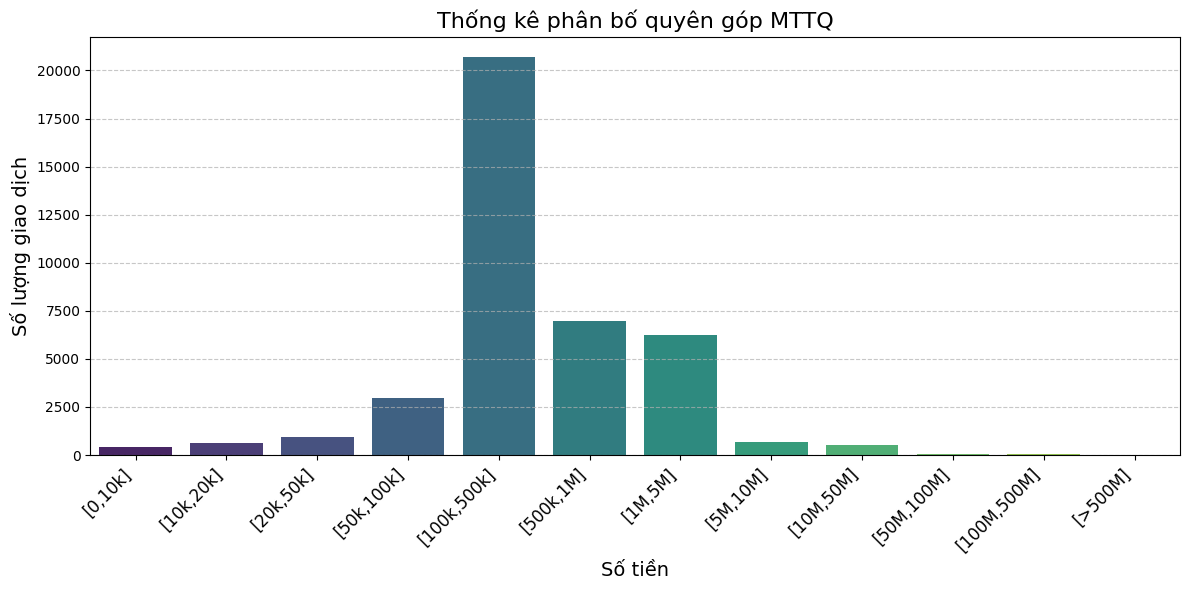

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bin_counts, x='Khoảng mệnh giá', y='Số lượng giao dịch', palette='viridis')

# Customize the chart
plt.title('Thống kê phân bố quyên góp MTTQ', fontsize=16)
plt.xlabel('Số tiền', fontsize=14)
plt.ylabel('Số lượng giao dịch', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [6]:
df_credit_per_day = df_transaction.groupby('date').agg(
    total_credit = ('credit', 'sum')
).reset_index()

df_credit_per_day['total_credit'] = df_credit_per_day['total_credit'].apply(lambda x: f'{x:,.0f}')

df_credit_per_day

,date,total_credit
0,01/09/2024,"285,000"
1,02/09/2024,"572,000"
2,03/09/2024,"1,111,000"
3,04/09/2024,"7,681,000"
4,05/09/2024,"1,201,888"
5,06/09/2024,"1,706,000"
6,07/09/2024,"6,613,000"
7,08/09/2024,"885,410,201"
8,09/09/2024,"7,868,744,495"
9,10/09/2024,"26,556,113,616"
